<center> <h1>Predicting the Outcome of Chess Games</h1> </center>

<center> <h4> By: Lewis Morgan </h4> </center>

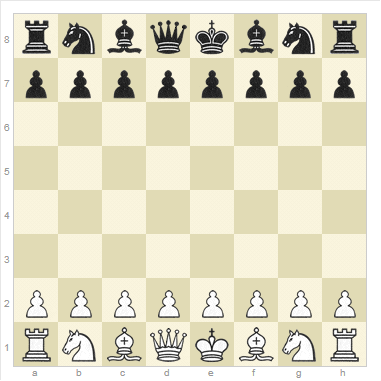

### Introduction:

One of the oldest games in the world, yet many have not pursued the game to greater lengths. Chess is a two-player game played on a checkered, 10x10 board. Both players have the same pieces, but there are rules for how certain pieces can move. The main goal is to 'checkmate' the opponents king which means you attack the enemy's king in a way where the king has nowhere else to go. There are other win conditions such as the opponent running out of time in a timed game, one side forfeiting, or a draw. In online chess, draws can be made by both players agreeing to one or the computer deems that neither side has sufficient material to win. If you are relatively new to the game of chess, you can [learn more here](https://www.chess.com/learn-how-to-play-chess).

A few other factors to point out are starting color, opening moves, and elo which may correlate to wins of a chess game. It is generally considered that whoever starts out with white has a small advantage as they can move first. The idea of this is that black has to usually react to white's moves making it difficult to counter and take the advantage. Opening moves relate to the theory behind chess as a whole. Openings are classified by common initial moves played by both sides. Certain openings may be countered quickly if the opponent knows what they are doing but can also be detrimental, creating traps for the opponent to fall into. Another important factor might be elo. Elo is the computer ranking of players determined by total points. Players with higher elo are generally better and thus are more likely to win games against lower rated players. Small margins between elos however may prove that both players are equally matched. Does the greater elo tend to win more? Does white win more? What are the results of games where black has a higher elo than white? What openings are best for white? What openings are best for black? What openings do players with higher elo tend to use the most? Can we infer what opening one will use depending on their elo? There are a lot of questions already starting to form and we have yet to even start our Data Science Pipeline.

### Data Science Pipeline:
The pipeline for data science contains data collection, data management/representation, exploratory data analysis, hypothesis testing and machine learning, as well as communication of insights gained. Much like the scientific method, this is not concrete and should go iterative if it seems necessary. For example, if you were to do exploratory data analyis to find out that the data gathered is insufficient, you probably need to collect more relevant data.

### Data Collection:
First, we need to import packages and libraries that we will be using throughout the tutorial.

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model

We will be retrieving the data from a database presented from kaggle. This database contains over 20,000 chess games from lichess (an online chess company). This was achieved by pooling chess 'groups' from lichess which can contain thousands of players. You can find the [dataset here](https://www.kaggle.com/datasnaek/chess?select=games.csv). This dataset  had to be downloaded and added to the notebook in order for it to be used. 

In [22]:
file = 'games.csv'
games = pd.read_csv(file)
games.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


What just happened? We read the csv file from the saved location that was uploaded to the notebook as `games.csv`. The function [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) is provided by pandas which does all the hard work for us. Now we have a dataframe, similar to a table, called `games` of which each row is a game entry. 